In [66]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import viz 
import env

In [ ]:
# Exercise 1 

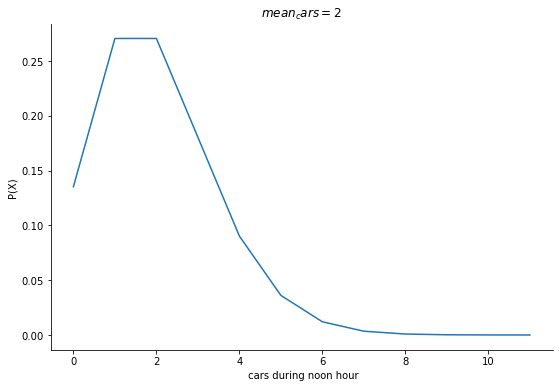

In [20]:
mean_cars = 2

x = np.arange(0,12)
y = stats.poisson(mean_cars).pmf(x)

plt.plot(x, y)
plt.title('$mean_cars = 2$')
plt.xlabel(' cars during noon hour')
plt.ylabel('P(X)');

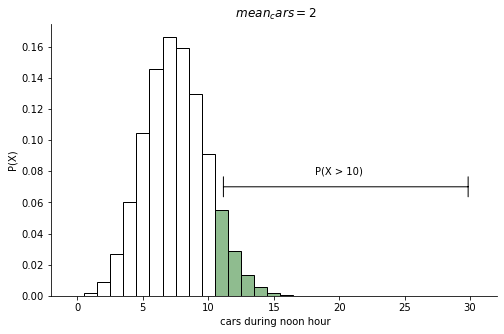

In [15]:
mean_cars = 2

x = np.arange(0,12)
y = stats.poisson(mean_cars).pmf(x)

viz.distributions_example4()
plt.title(' $mean_cars = 2$')
plt.xlabel(' cars during noon hour')
plt.ylabel('P(X)');

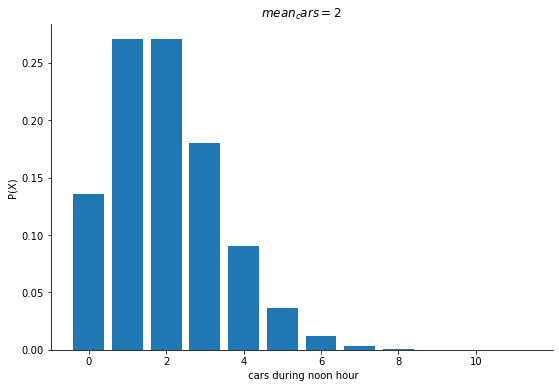

In [21]:
mean_cars = 2

x = np.arange(0,12)
y = stats.poisson(mean_cars).pmf(x)

plt.bar(x, y)
plt.title('$mean_cars = 2$')
plt.xlabel(' cars during noon hour')
plt.ylabel('P(X)');

In [17]:
stats.poisson(mean_cars).pmf(0)

0.1353352832366127

In [18]:
stats.poisson(mean_cars).sf(2)

0.32332358381693654

In [19]:
stats.poisson(mean_cars).sf(0)

0.8646647167633873

In [7]:
stats.norm(3, 0.3).isf(0.05)

3.4934560880854417

In [ ]:
# Exercise 2

In [23]:
(np.random.normal(3, 0.3, 100000) < 0.5)

array([False, False, False, ..., False, False, False])

In [8]:
stats.norm(3, 0.3).ppf(0.15)

2.689069983151863

In [26]:
stats.norm(3, 0.3).cdf(2.8) # Would a student with a 2.8 gpa make the scholarship in the third decile.

0.2524925375469227

1st decile: 0-10 percentile  
2nd decile: 10-20 percentile   
3rd decile: 20-30 percentile

In [ ]:
# yes the student would qualify for the scholership.

In [27]:
# what is the gpa is a 3.5 in the decile  

stats.norm(3, 0.3).cdf(3.5)

0.9522096477271853

In [ ]:
# it is the 1st decile 

In [ ]:
# Exercise 3

In [36]:
c = np.random.choice([0,1], size = (10_000, 4326), p = (0.98, 0.02))
c

array([[0, 0, 1, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [37]:
(c.sum(axis = 1) >= 97).mean()

0.1398

In [ ]:
# Exercise 4

Text(0.5, 0, 'Number of time area is cleaned per day')

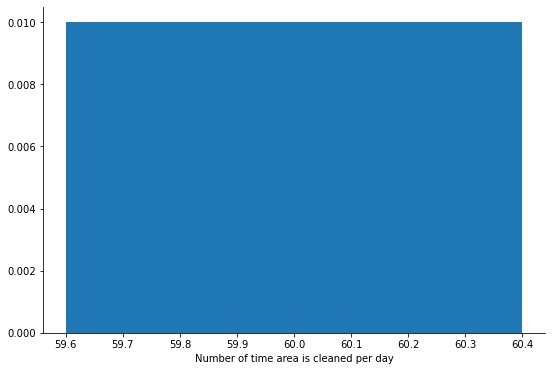

In [41]:
answers = 60
points = 0.01

stats.binom(answers, points).sf(0)
plt.bar(n, p)
plt.xlabel('Number of time area is cleaned per day')

In [42]:
answers = 60
points = 0.01

stats.binom(answers, points).sf(0)

0.45284335760923855

In [ ]:
# Exercise 5

In [48]:
# How likely is it that the break area gets cleaned up each day?

number = (0.9 * 3 * 22)
percent = 0.03

stats.binom(number, percent).sf(0)

0.8362274861228873

Text(0.5, 0, 'amount of times area is cleaned per day')

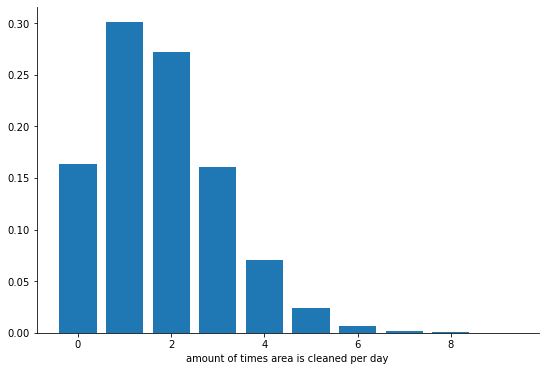

In [49]:
x = np.arange(0, 10)
y = stats.binom(number,percent).pmf(x)

plt.bar(x, y)
plt.xlabel('amount of times area is cleaned per day')

Text(0.5, 0, 'amount of times area is cleaned per day')

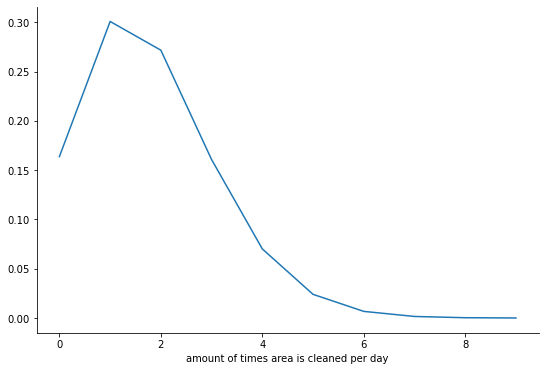

In [50]:
x = np.arange(0, 10)
y = stats.binom(n,p).pmf(x)

plt.plot(x, y)
plt.xlabel('amount of times area is cleaned per day')

In [54]:
stats.binom(number * 2, percent).pmf(0)

0.026821436301628983

In [55]:
stats.binom(number * 5, percent).pmf(0)

0.00011781621791055051

In [ ]:
# Exercise 6 

In [61]:
mean = 30
std_dev = 6
stats.norm(mean, std_dev).cdf(33)

0.6914624612740131

Text(0.5, 0, 'Time to wait, before being late ')

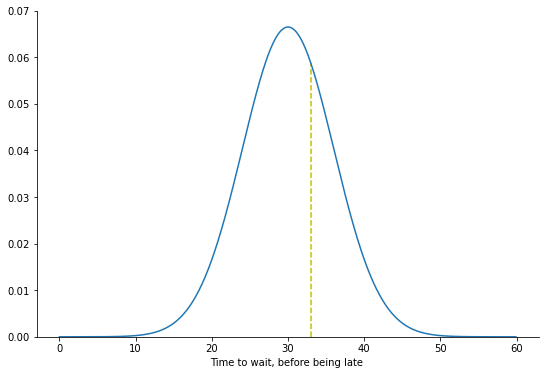

In [62]:
x = np.arange(0, 60 , 0.1)
y = stats.norm(mean, std_dev).pdf(x)

plt.plot(x,y)
plt.vlines(33, 0 ,stats.norm(mean, std_dev).pdf(33),  ls = '--', color = 'y')
plt.ylim(0,0.07)
plt.xlabel('Time to wait, before being late ')

In [65]:
(np.random.normal(15, 3, 1000 * 10) < 16.5).mean()

0.6947

#### 7. Connect to the employees database and find the average salary of current employees, along with the standard deviation. For the following questions, calculate the answer based on modeling the employees salaries with a normal distribution defined by the calculated mean and standard deviation then compare this answer to the actual values present in the salaries dataset.

What percent of employees earn less than 60,000?  
What percent of employees earn more than 95,000?  
What percent of employees earn between 65,000 and 80,000?  
What do the top 5% of employees make?

In [68]:
url = f'mysql+pymysql://{env.user}:{env.password}@{env.host}/employees'
query = '''
SELECT *
FROM salaries s
WHERE s.to_date > NOW()
'''
salaries = pd.read_sql(query, url)

In [38]:
salaries

,emp_no,salary,from_date,to_date
0,10001,88958,2002-06-22,9999-01-01
1,10002,72527,2001-08-02,9999-01-01
2,10003,43311,2001-12-01,9999-01-01
3,10004,74057,2001-11-27,9999-01-01
4,10005,94692,2001-09-09,9999-01-01
...,...,...,...,...
240119,499995,52868,2002-06-01,9999-01-01
240120,499996,69501,2002-05-12,9999-01-01
240121,499997,83441,2001-08-26,9999-01-01
240122,499998,55003,2001-12-25,9999-01-01


In [70]:
mean = salaries.salary.mean()
std_dev = salaries.salary.std()

In [71]:
mean, std_dev

(72012.23585730705, 17309.99538025198)

In [72]:
stats.norm(mean, std_dev).cdf(60000)

0.24385742480214423

In [73]:
stats.norm(mean, std_dev).sf(95000)

0.09208819199804053

In [75]:
np.diff(stats.norm(mean, std_dev).cdf([65000, 80000]))

array([0.33506057])

In [76]:
(stats.norm(mean, std_dev).cdf([65000, 80000]))

array([0.34270292, 0.67776349])

In [77]:
stats.norm(mean, std_dev).isf(0.05)

100484.64454102777

<AxesSubplot:>

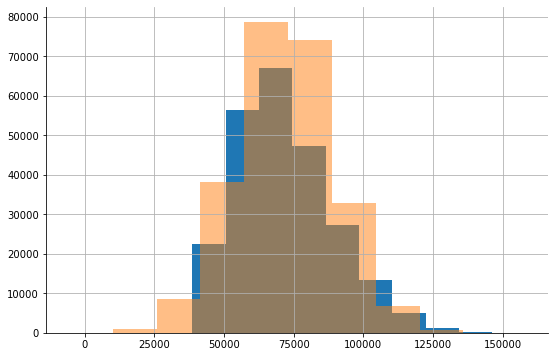

In [82]:
salaries.salary.hist()
pd.Series(stats.norm(mean, std_dev).rvs(240124)).hist(alpha = 0.5)

<AxesSubplot:>

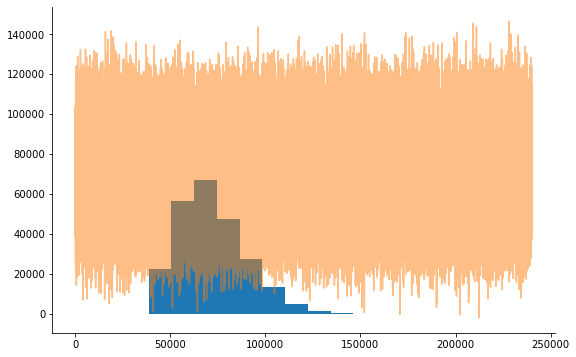

In [85]:
salaries.salary.hist()
pd.Series(stats.norm(mean, std_dev).rvs(240124)).plot(alpha = 0.5)